In [56]:
# Import pandas module
import pandas as pd

# Set display columns to max to allow us to see all columns in results
pd.set_option('display.max_columns', None)

# Read the loan_clean csv file in
loan = pd.read_csv('loan_clean.csv')

In [57]:
loan.head()

,unique_num,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_rec_prncp,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_cur_bal,total_rev_hi_lim,avg_cur_bal,delinq_amnt,mort_acc,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,revol_bal_joint,sec_app_mort_acc,hardship_flag
0,0,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Dec-2018,Current,debt_consolidation,NY,18.24,0.0,Apr-2001,999.0,9.0,1.0,10.3,34.0,113.98,Individual,NaN,NaN,0.0,16901.0,42000.0,1878.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16901.0,NaN,NaN,N
1,1,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Dec-2018,Current,debt_consolidation,LA,26.52,0.0,Jun-1987,71.0,13.0,1.0,24.2,44.0,612.25,Individual,NaN,NaN,0.0,321915.0,50800.0,24763.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,99468.0,NaN,NaN,N
2,2,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Dec-2018,Current,debt_consolidation,MI,10.51,0.0,Apr-2011,999.0,8.0,0.0,19.1,13.0,212.79,Individual,NaN,NaN,0.0,110299.0,24100.0,18383.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11749.0,NaN,NaN,N
3,3,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Dec-2018,Current,debt_consolidation,WA,16.74,0.0,Feb-2006,999.0,10.0,0.0,78.1,13.0,168.07,Individual,NaN,NaN,0.0,305049.0,7000.0,30505.0,0.0,3.0,0.0,0.0,0.0,100.0,0.0,36151.0,NaN,NaN,N
4,4,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Dec-2018,Current,debt_consolidation,MD,26.35,0.0,Dec-2000,999.0,12.0,0.0,3.6,26.0,660.98,Individual,NaN,NaN,0.0,116007.0,23100.0,9667.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,29674.0,NaN,NaN,N


# Preparing data for Train/Test Split

In [58]:
# Create a function to encode 'acc_now_delinq' to 1 for delinquent and 0 for non-delinquent (to use as the target/result)

def delinq(delinq_count):
    if delinq_count != 0:
        return 1
    else:
        return 0

# Apply the 'acc_now_delinq' column which shows number of delinquent accounts to the function and assigning it to a new column 'delinq_status'
loan['delinq_status'] = loan.acc_now_delinq.apply(delinq)

In [59]:
# Sanity-check to confirm that the encoding worked

loan.groupby('delinq_status')['unique_num'].agg(['count'])

,count
delinq_status,
0,1994496
1,8173


In [60]:
# One-hot encoding categorical features using pd.get_dummies

In [61]:
# Encode sub_grades
sub_grade_dummies = pd.get_dummies(loan.sub_grade, prefix='sub_grade')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
sub_grade_dummies.drop(sub_grade_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades = pd.concat([loan, sub_grade_dummies], axis=1)

In [62]:
# Encode purpose
purpose_dummies = pd.get_dummies(loan.purpose, prefix='purpose')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
purpose_dummies.drop(purpose_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose = pd.concat([loan_grades, purpose_dummies], axis=1)

In [63]:
# Encode addr_state
state_dummies = pd.get_dummies(loan.addr_state, prefix='state')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
state_dummies.drop(state_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose_state = pd.concat([loan_grades_purpose, state_dummies], axis=1)

In [64]:
# Encode emp_length
emplen_dummies = pd.get_dummies(loan.emp_length, prefix='emplen')

# Dropping the first column given we only need n-1 columns, with n being total number of columns
emplen_dummies.drop(emplen_dummies.columns[0], axis=1, inplace=True)

# Concatenating sub_grade_dummies with the main 'loan' dataframe
loan_grades_purpose_state_emplen = pd.concat([loan_grades_purpose_state, emplen_dummies], axis=1)

In [65]:
loan_encoded = loan_grades_purpose_state_emplen

# Performing Train/Test Split

In [66]:
# Importing relevant modules for the train/test split
from sklearn.model_selection import train_test_split


Based on the analysis done in the EDA stage, we have determined the below features to use in the model:

<u>Numerical</u>
- annual_inc
- dti

<u>Categorical</u>
- addr_state
- sub_grade
- purpose
- emp_length

In [67]:
# Create feature matrix (X), i.e. features or factors that would impact prediction of delinquency

# Create list of feature columns with the numerical features
feature_cols = ['annual_inc', 'dti', 'pub_rec_bankruptcies', 'delinq_2yrs', 'mths_since_last_delinq']


In [68]:
# Use list comprehension to add the dummies columns



In [69]:
feature_cols

['annual_inc',
 'dti',
 'pub_rec_bankruptcies',
 'delinq_2yrs',
 'mths_since_last_delinq']

In [70]:
# Creating feature matrix (X)
X = loan_encoded[feature_cols]

# Creating response vector (y)
y = loan_encoded.delinq_status


In [71]:
# Performing the train/test split with the test set set to 30% of dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Setting up a baseline model and determining baseline accuracy

In [72]:
import numpy as np

# Finding the mode (or most frequent result) in y_train
most_freq_class = y_train.mode().index[0]

# The baseline accuracy is the average number of times that the result in the test set would be the most frequent class
baseline_accuracy = np.mean(y_test == most_freq_class)
baseline_accuracy

# The baseline accuracy is at 99.6%

0.9959320973167488

# Creating Oversample set using SMOTE

In [73]:
# Importing SMOTE module
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE oversampling algorithm
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


# Using the K-Nearest Neighbor model

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the model
knn.fit(X_train_oversampled, y_train_oversampled)

# Predicting y_train by using the model and X_train
y_train_pred = knn.predict(X_train)

metrics.accuracy_score(y_train, y_train_pred)

0.9999850199876166

In [75]:
# Compute accuracy, precision, recall, and F1 scores of model
from sklearn.metrics import f1_score, classification_report

report = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,9.999936e-01,0.997906,0.999985,9.989500e-01,9.999850e-01
recall,9.999914e-01,0.998429,0.999985,9.992102e-01,9.999850e-01
f1-score,9.999925e-01,0.998168,0.999985,9.990801e-01,9.999850e-01
support,1.396139e+06,5729.000000,0.999985,1.401868e+06,1.401868e+06


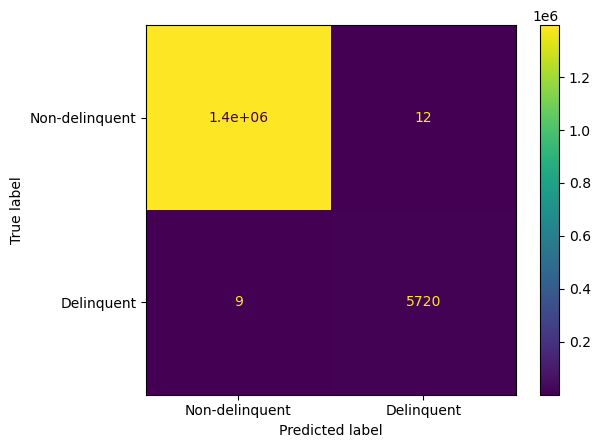

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_train, y_train_pred)

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred), display_labels = ['Non-delinquent', 'Delinquent']).plot();

In [77]:
cm = confusion_matrix(y_train, y_train_pred)
FN = cm[0, 1]
TN = cm[1, 1]

print("False Negative count: ", FN)
print("True Negative count: ", TN)
print("Negative Predictive Value: ", TN/(TN+FN))

False Negative count:  12
True Negative count:  5720
Negative Predictive Value:  0.9979064898813678


In [51]:
# Looking for best k-value

score = []

for k in range(1, 101):

    knn = KNeighborsClassifier(n_neighbors= k)

    knn.fit(X_train_oversampled, y_train_oversampled)

    y_train_pred = knn.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    score.append([k, accuracy])
    
    print(f"{k} done")

score

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done
100 done


[[1, 0.9999850199876166],
 [2, 0.9999536332950035],
 [3, 0.9942405419055147],
 [4, 0.9946642622557901],
 [5, 0.991359386190426],
 [6, 0.9918337532492361],
 [7, 0.9893863045593451],
 [8, 0.9898414116022336],
 [9, 0.9878355166106937],
 [10, 0.9883070303338117],
 [11, 0.986463062142798],
 [12, 0.986903902507226],
 [13, 0.9851983210972788],
 [14, 0.9856220414475543],
 [15, 0.9841033535254389],
 [16, 0.9845235072060993],
 [17, 0.983161752747049],
 [18, 0.9835241263799445],
 [19, 0.9822379853167346],
 [20, 0.9826089189567063],
 [21, 0.9813848379447994],
 [22, 0.9817571982526172],
 [23, 0.9806743573574688],
 [24, 0.9810438643295946],
 [25, 0.9799517500934467],
 [26, 0.9802834503676523],
 [27, 0.9792270028276556],
 [28, 0.9795480030930159],
 [29, 0.9785357822562467],
 [30, 0.97885749585553],
 [31, 0.9778659617025284],
 [32, 0.9781848219661194],
 [33, 0.9772796012178037],
 [34, 0.9775913281421647],
 [35, 0.9766575740369279],
 [36, 0.9769621676220586],
 [37, 0.9761404069427364],
 [38, 0.97643644

In [52]:
score_sorted = sorted(score, key=lambda x: x[1], reverse=True)

score_sorted

[[1, 0.9999850199876166],
 [2, 0.9999536332950035],
 [4, 0.9946642622557901],
 [3, 0.9942405419055147],
 [6, 0.9918337532492361],
 [5, 0.991359386190426],
 [8, 0.9898414116022336],
 [7, 0.9893863045593451],
 [10, 0.9883070303338117],
 [9, 0.9878355166106937],
 [12, 0.986903902507226],
 [11, 0.986463062142798],
 [14, 0.9856220414475543],
 [13, 0.9851983210972788],
 [16, 0.9845235072060993],
 [15, 0.9841033535254389],
 [18, 0.9835241263799445],
 [17, 0.983161752747049],
 [20, 0.9826089189567063],
 [19, 0.9822379853167346],
 [22, 0.9817571982526172],
 [21, 0.9813848379447994],
 [24, 0.9810438643295946],
 [23, 0.9806743573574688],
 [26, 0.9802834503676523],
 [25, 0.9799517500934467],
 [28, 0.9795480030930159],
 [27, 0.9792270028276556],
 [30, 0.97885749585553],
 [29, 0.9785357822562467],
 [32, 0.9781848219661194],
 [31, 0.9778659617025284],
 [34, 0.9775913281421647],
 [33, 0.9772796012178037],
 [36, 0.9769621676220586],
 [35, 0.9766575740369279],
 [38, 0.9764364405207908],
 [37, 0.97614040

# Testing the model on the Test Set

In [78]:
# Predicting y by using the model and X_test
y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.9922270435635094

In [79]:
# Compute accuracy, precision, recall, and F1 scores of model

report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.998782,0.303496,0.992227,0.651139,0.995953
recall,0.993407,0.703355,0.992227,0.848381,0.992227
f1-score,0.996087,0.424026,0.992227,0.710056,0.993760
support,598357.000000,2444.000000,0.992227,600801.000000,600801.000000


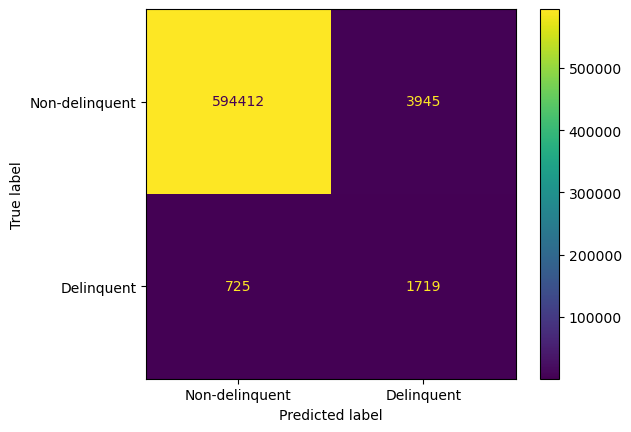

In [80]:
# Insert y_test (actual result) and y_pred (predicted result) as inputs
confusion_matrix(y_test, y_pred)

# Create confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Non-delinquent', 'Delinquent']).plot();

In [81]:
# Assigning the confusion matrix to variable 'cm'
cm = confusion_matrix(y_test, y_pred)

# Defining False Negative and True Negative and their counts
FN = cm[0, 1]
TN = cm[1, 1]

# Print the various results and calculation
print("False Negative count: ", FN)
print("True Negative count: ", TN)
print("Negative Predictive Value: ", TN/(TN+FN))

False Negative count:  3945
True Negative count:  1719
Negative Predictive Value:  0.3034957627118644
